In [1]:
import sys
#sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')


from Ltif import Lpicday, Lpic
from sklearn import datasets, metrics, svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [5]:
tst = '23_11_30'
tst[:2]

'23'

In [2]:
df = Lpicday('23_11_30').clusters_day(min_size = 100)
cl = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]

100%|██████████| 361/361 [01:04<00:00,  5.61it/s]


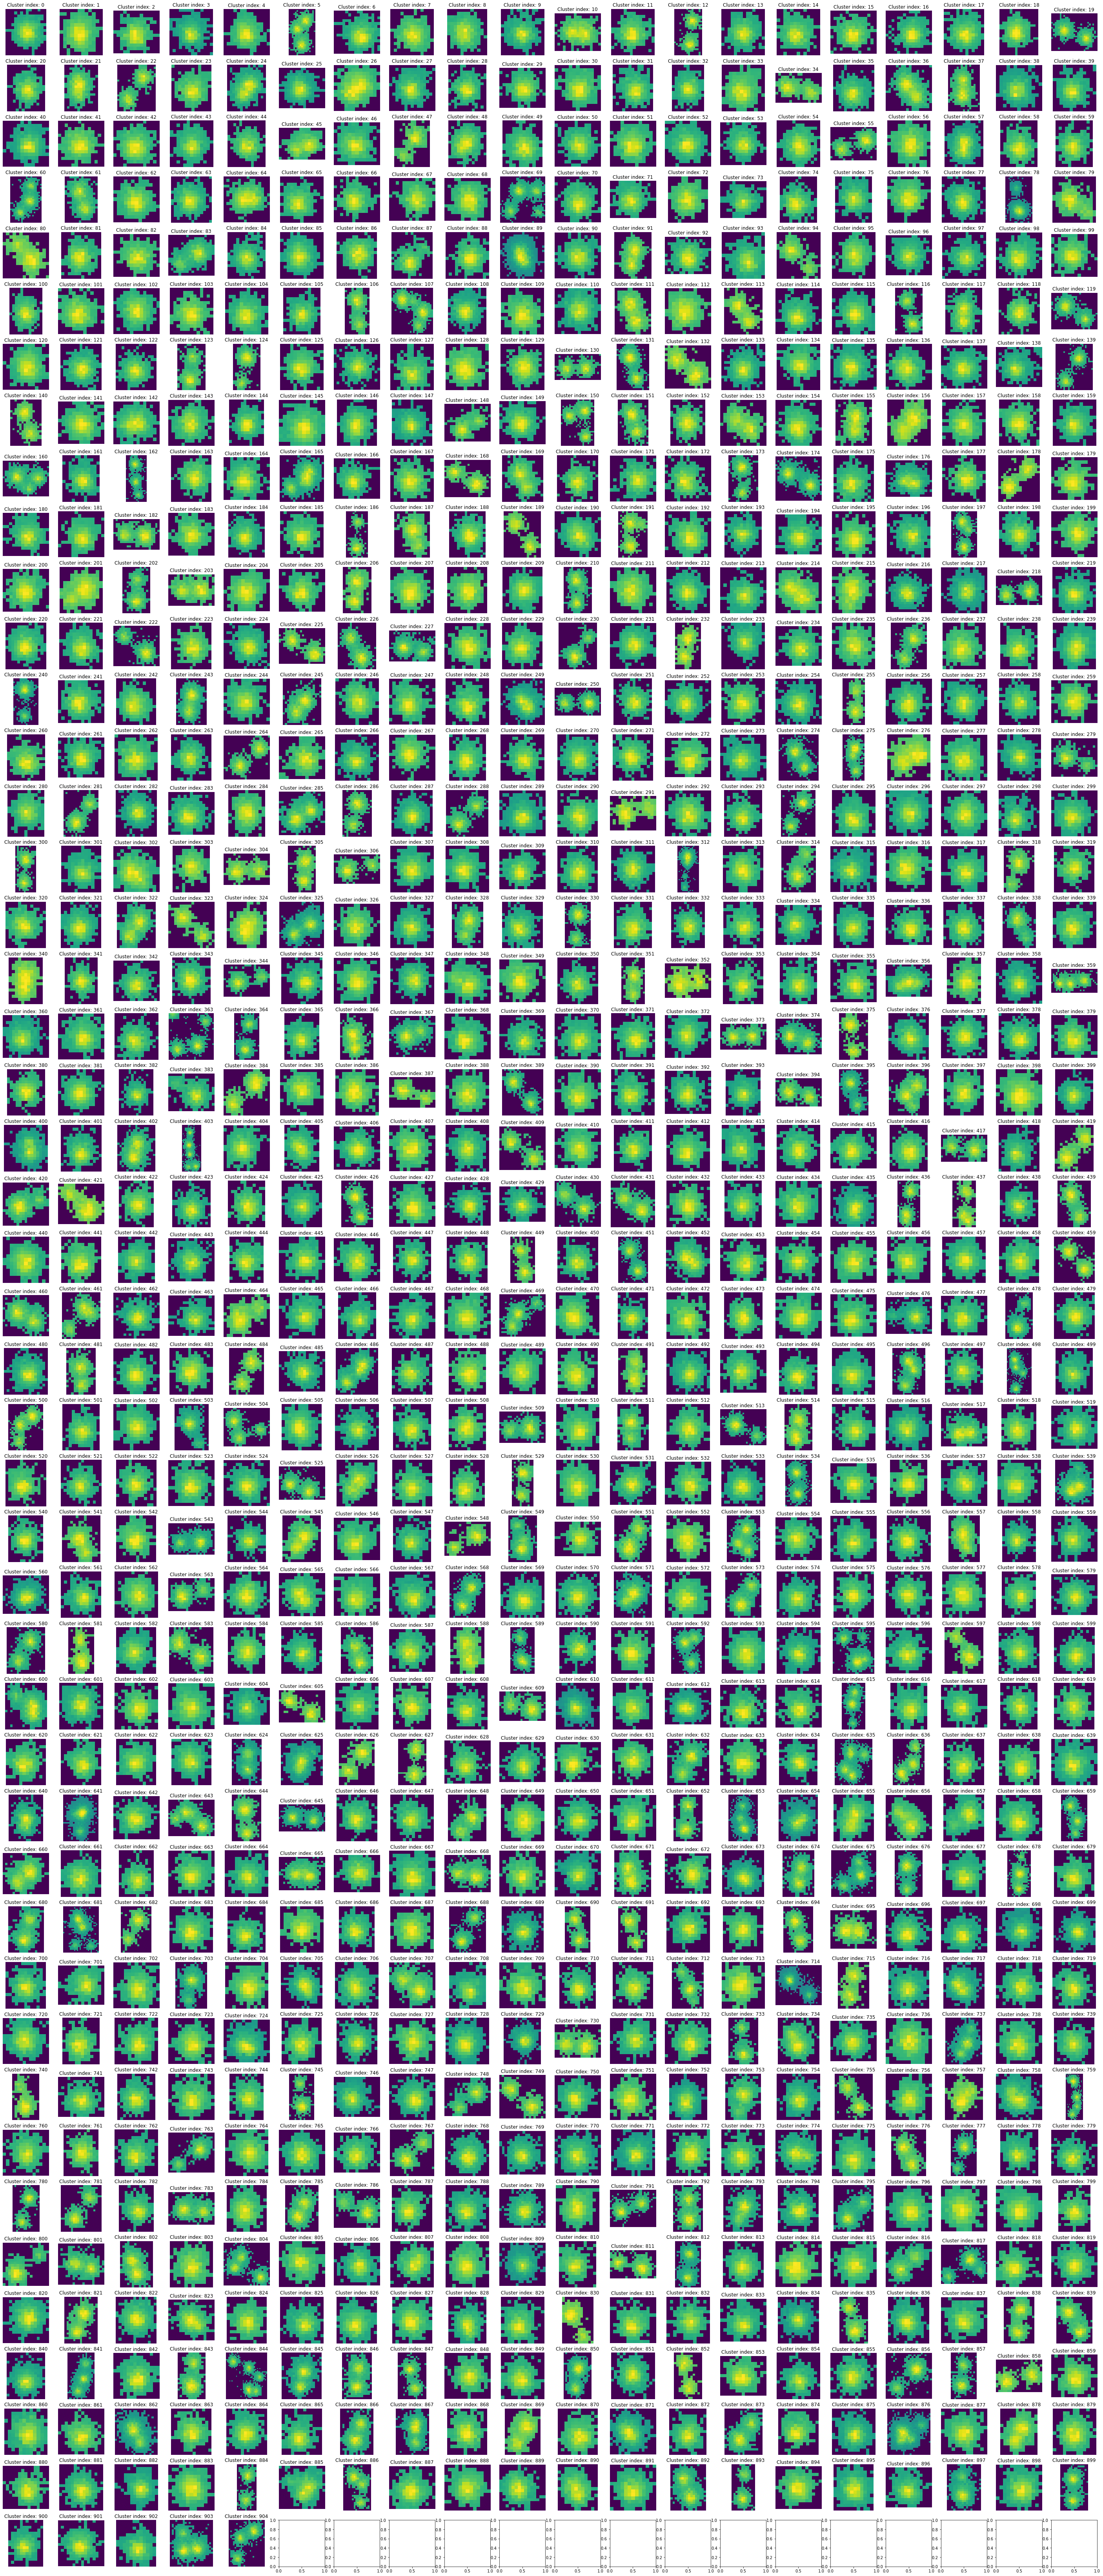

In [7]:
rows, cols = 46, 20

_, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (50,120))


for i in range(rows):
    for ax, image, label in zip(axes[i], cl[cols * i:], list(range(0,len(cl)))[cols * i:]):
        ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest')
        ax.set_title('Cluster index: %i' % label)

In [3]:
target = np.array([1,1,1,1,1,3,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,1,
                   1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,3,2,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,2,1,
                   2,1,1,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,3,1,1,1,2,1,2,1,1,2,2,1,2,
                   1,1,1,2,2,1,1,1,1,1,2,2,2,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,2,1,3,2,1,2,1,1,1,1,1,1,
                   3,1,3,1,1,2,1,1,2,2,1,1,1,2,2,1,1,1,2,1,1,1,2,1,1,1,2,1,1,2,1,2,1,1,1,1,1,3,1,1,
                   1,1,2,2,1,1,2,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,2,1,1,2,2,2,1,1,2,1,2,1,1,1,2,1,1,1,
                   2,1,1,2,1,2,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,3,1,1,1,2,
                   1,2,1,1,1,2,2,1,2,1,1,2,1,1,2,1,1,1,1,1,2,1,1,1,2,2,2,1,1,1,1,1,2,1,2,1,1,1,2,1,
                   1,1,2,2,1,2,1,1,2,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,2,2,1,1,1,1,1,1,3,
                   1,1,1,3,2,1,2,2,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,1,1,2,2,3,1,1,1,
                   1,1,2,5,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,2,2,2,1,1,1,1,2,1,1,1,2,2,1,1,1,1,2,2,1,2,
                   1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,2,2,2,1,1,2,1,1,1,1,3,1,1,1,1,1,1,2,1,2,1,
                   1,2,1,1,2,1,2,1,1,1,1,2,1,1,1,1,3,1,4,1,3,1,1,2,3,1,1,1,1,2,1,2,1,2,2,1,1,1,1,1,
                   1,1,1,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,2,2,1,2,1,3,1,1,1,1,1,1,
                   1,1,1,2,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,2,2,1,2,1,1,2,1,1,2,1,1,3,1,1,3,1,2,1,1,
                   2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,3,1,1,1,1,1,1,1,1,2,1,2,2,1,1,1,1,2,1,1,4,3,1,1,1,
                   1,2,1,3,2,2,1,1,2,1,1,1,2,3,1,1,1,1,1,3,2,1,1,1,1,2,1,1,2,1,1,2,1,1,2,3,2,1,3,1,
                   2,4,2,1,1,1,1,1,2,1,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,2,1,2,2,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,3,1,1,2,1,1,1,1,2,1,1,2,2,1,1,1,1,1,2,1,1,1,4,
                   1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2,2,1,2,1,2,2,1,1,1,1,2,2,2,1,2,1,1,1,1,
                   2,2,2,1,3,1,1,1,1,1,1,2,2,1,1,1,2,3,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,2,2,
                   1,3,1,2,5,2,2,2,1,1,2,1,2,1,1,1,2,2,2,1,1,1,2,1,1,1,2,2,1,2,1,1,1,2,1,1,2,1,1,1,
                   1,1,1,1,2,1,3,1,1,1,1,1,2,2,1,1,1,2,1,2,1,1,1,3,3])

target = [val if val < 3 else 2 for val in target]

In [5]:
cl = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]

max_h, max_w = 53, 42

for item in [val for bal in cl for val in bal]:
    while len(item) < max_w:
        item += [0]

for item in cl:
    while len(item) < max_h:
        item += [[0] * max_w]
        
ac = np.array(cl)

data = ac.reshape(len(cl), -1)

In [10]:
#clf = load('/eos/user/l/lkoller/ML models/clust_num_v5.txt')
clf = load('/eos/user/l/lkoller/ML models/clust_num_v4.txt')

In [11]:
predicted = clf.predict(data)

In [16]:
len(target), len([val for val in target if val>1])

(905, 260)

In [51]:
(1-15/905)*100

98.34254143646409

In [49]:
len([[val,bal] for val,bal in zip(target,predicted) if val!=bal]), [[val,bal] for val,bal in zip(target,predicted) if val!=bal]

(15,
 [[2, 1],
  [2, 1],
  [1, 2],
  [2, 1],
  [2, 1],
  [2, 1],
  [1, 2],
  [2, 1],
  [2, 1],
  [1, 2],
  [1, 2],
  [2, 1],
  [1, 2],
  [2, 1],
  [2, 1]])

In [55]:
print(len([[val,bal] for val,bal in zip(target,predicted) if val!=bal and val==1]))
print(len([val for val in target if val == 1]))
print(((len([val for val in target if val == 1])-len([[val,bal] for val,bal in zip(target,predicted) if val!=bal and val==1]))/len([val for val in target if val == 1]))*100)

5
645
99.2248062015504


In [56]:
print(len([[val,bal] for val,bal in zip(target,predicted) if val!=bal and val==2]))
print(len([val for val in target if val == 2]))
print(((len([val for val in target if val == 2])-len([[val,bal] for val,bal in zip(target,predicted) if val!=bal and val==2]))/len([val for val in target if val == 2]))*100)

10
260
96.15384615384616


In [15]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(target, predicted)}\n"
)

Classification report for classifier SVC(probability=True):
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       645
           2       0.98      0.96      0.97       260

    accuracy                           0.98       905
   macro avg       0.98      0.98      0.98       905
weighted avg       0.98      0.98      0.98       905




In [8]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(target, predicted)}\n"
)

Classification report for classifier SVC(probability=True):
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       645
           2       0.99      0.98      0.99       260

    accuracy                           0.99       905
   macro avg       0.99      0.99      0.99       905
weighted avg       0.99      0.99      0.99       905




In [66]:
clf.score(data,target)

0.9834254143646409

In [68]:
list(enumerate(clf.predict_proba(data[ind])))

[(0, array([0.48982883, 0.51017117])),
 (1, array([0.87221033, 0.12778967])),
 (2, array([0.85049741, 0.14950259])),
 (3, array([0.20700297, 0.79299703])),
 (4, array([0.19914487, 0.80085513])),
 (5, array([0.60137362, 0.39862638]))]

In [36]:
image[image>0]

array([ 880,  884,  876,  884,  928,  896,  912,  888,  916,  944,  964,
        884,  912,  920,  944,  968, 1000,  976,  960,  932,  892,  880,
        916,  924,  940, 1024, 1084, 1024,  936,  932,  920,  880,  896,
        916, 1024, 1116, 1204, 1200, 1072,  992,  948,  884,  888,  932,
       1028, 1156, 1184, 1196, 1080, 1068,  948,  876,  928,  964,  932,
       1060, 1108, 1260, 1240, 1176, 1024,  928,  908,  916,  932,  928,
       1004, 1076, 1052, 1080, 1020,  956,  908,  880,  984,  960,  980,
        996, 1004, 1004,  960,  920,  888,  892,  996, 1016,  980, 1000,
        976,  912,  912,  884,  880,  888, 1004, 1120, 1096, 1016, 1008,
        956,  880,  884,  876,  920,  940, 1084, 1120, 1164, 1040,  896,
        904,  916,  952, 1140, 1116, 1152,  936,  904,  876,  916,  980,
       1008, 1044, 1076,  912,  908,  900,  880,  876,  972,  960,  924,
        904,  888,  888,  884,  880])

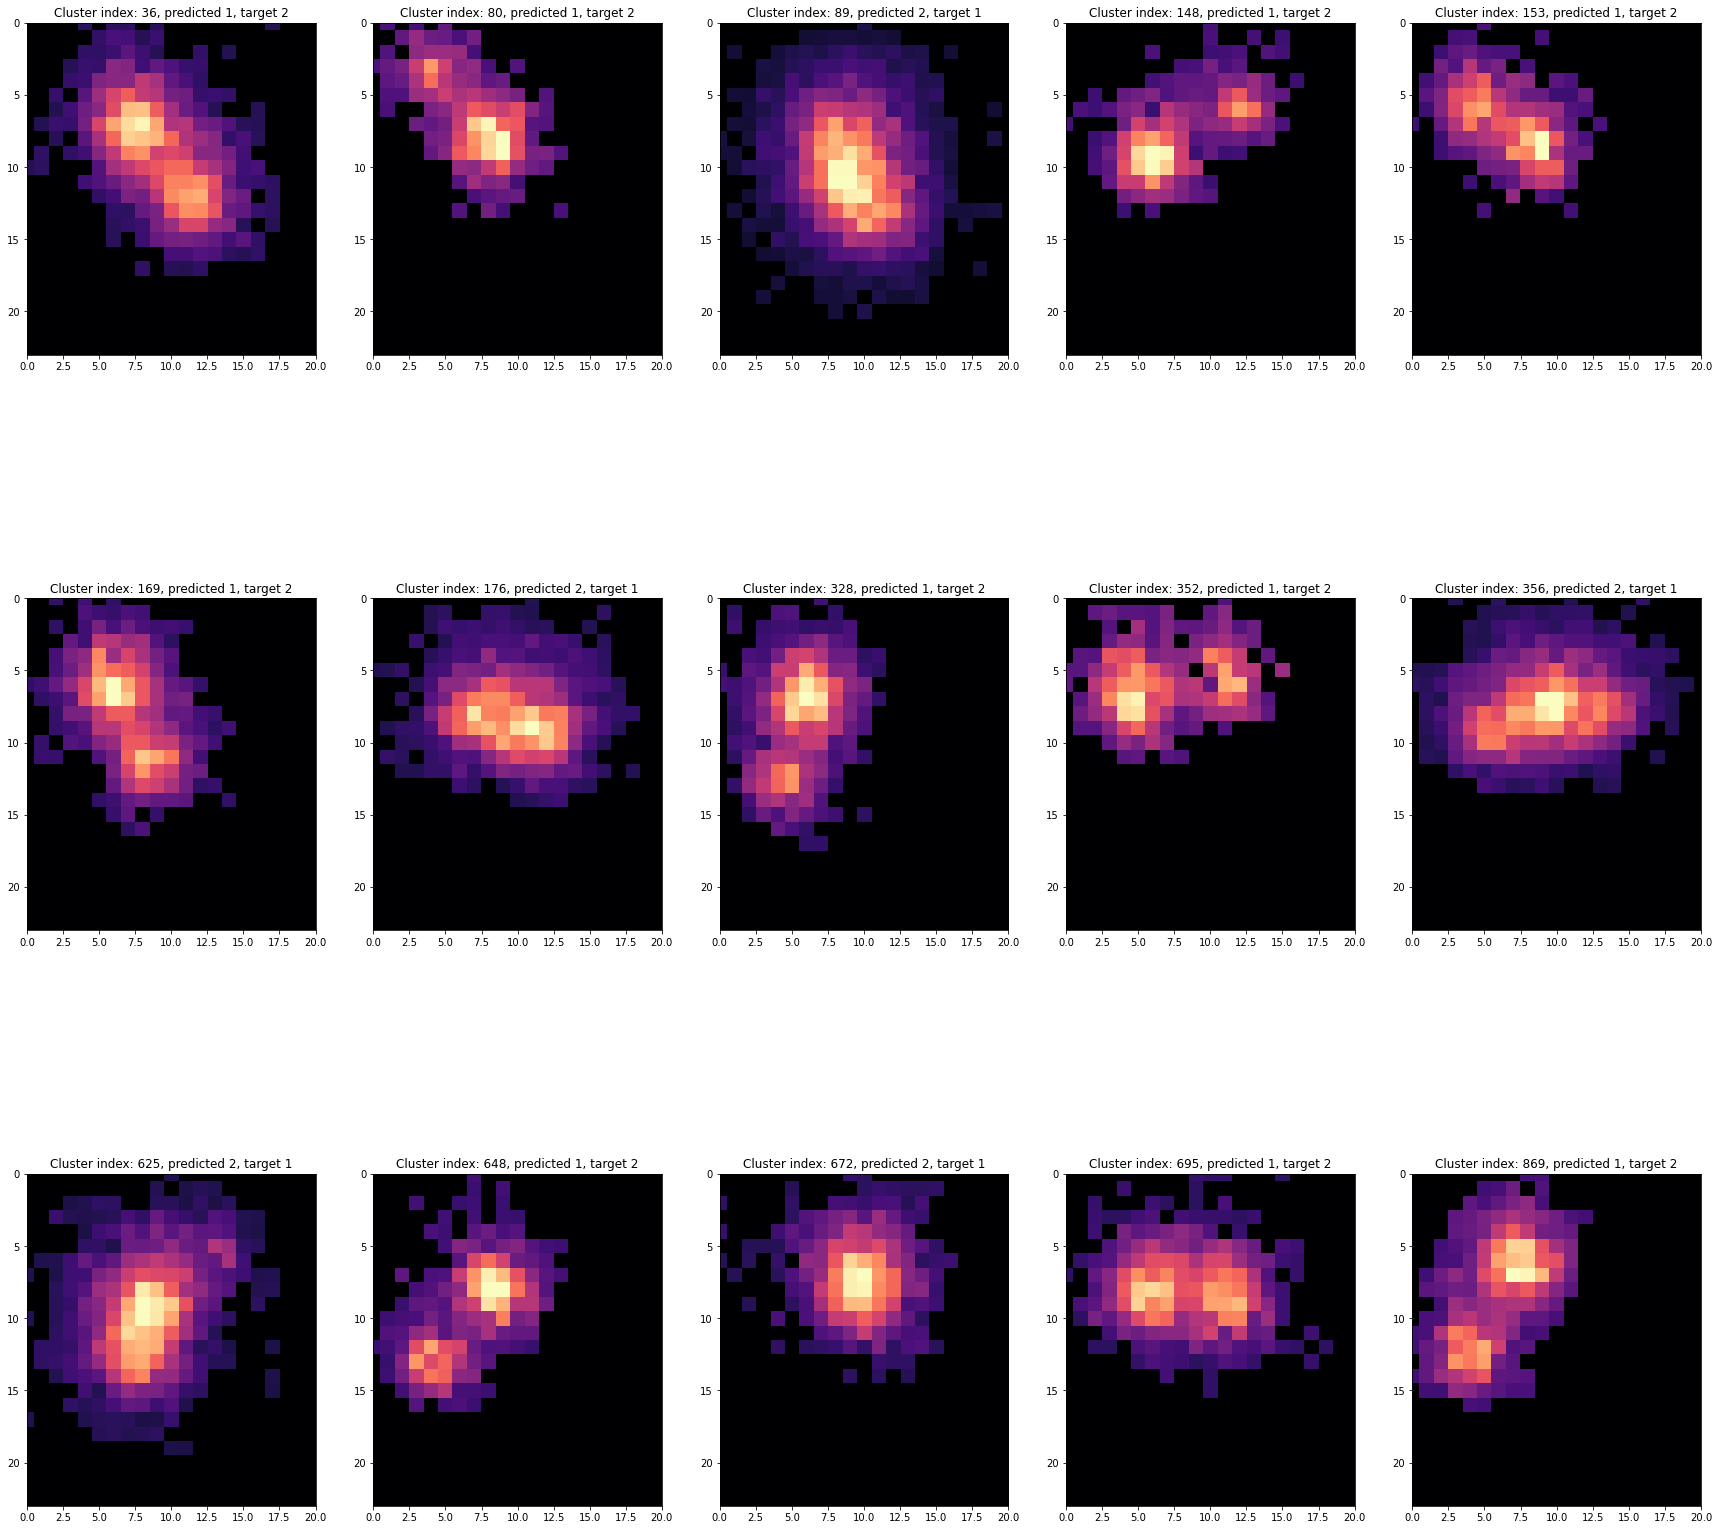

In [47]:
ind = [val[0] for val in list(enumerate(predicted == target)) if val[1] == False]

_, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30,30))

for i in range(3):
    for ax, image, label in zip(axes[i], ac[ind][5 * i:], ind[5 * i:]):
        #ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest', cmap = 'magma', vmin = np.min(image[image>0])-100, vmax = np.average(image[image>0])+3*np.std(image[image>0]))
        ax.set_xlim(0, 20)
        ax.set_ylim(23,0)
        ax.set_title('Cluster index: %i, predicted %i, target %i' % (label,predicted[label],target[label]))


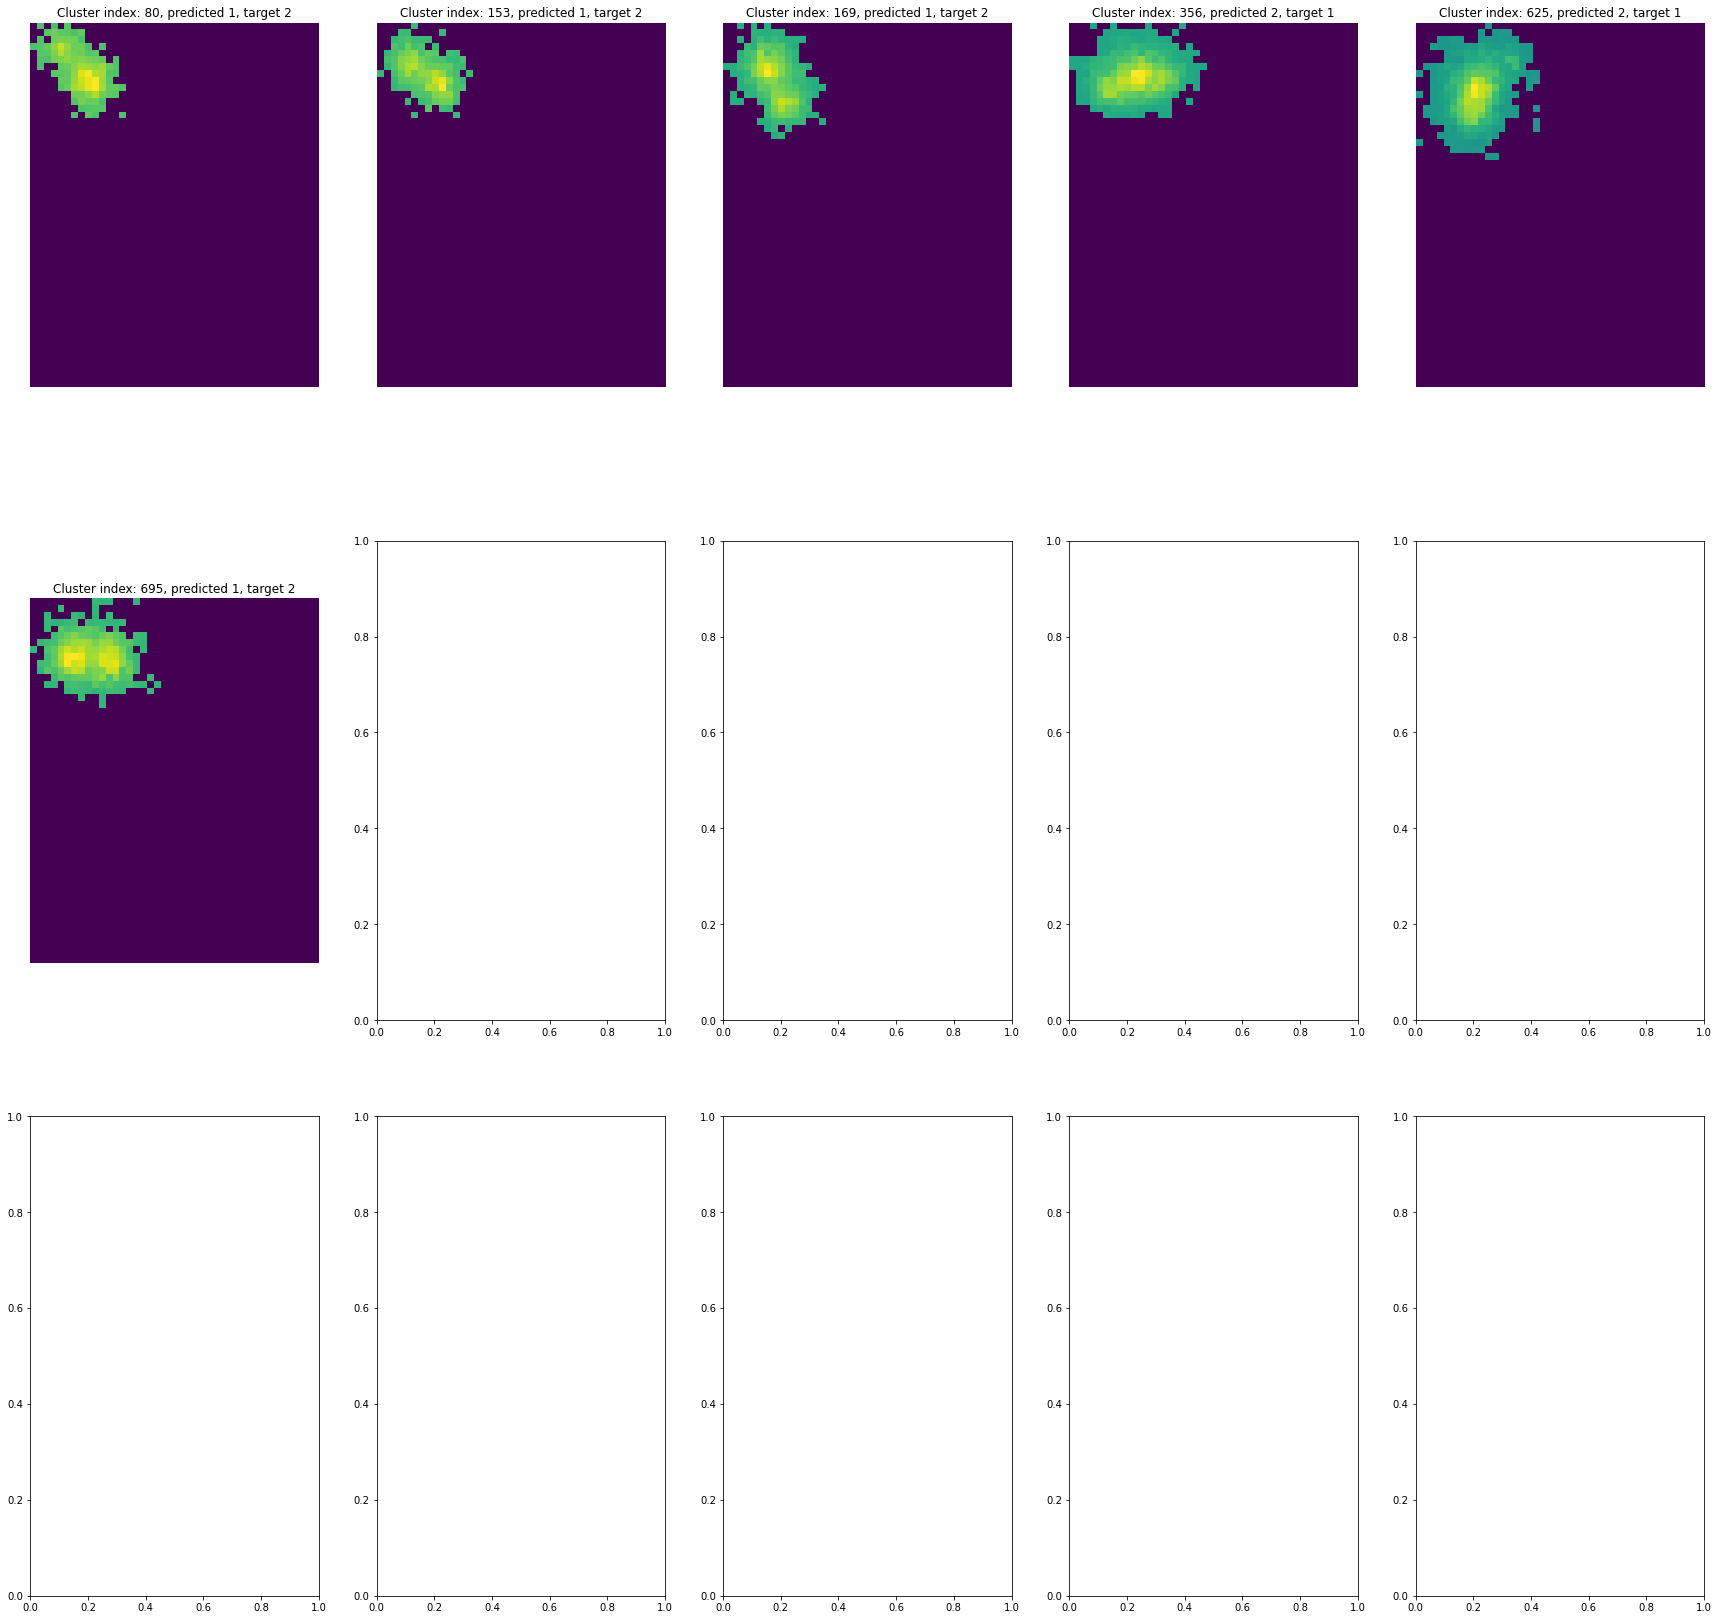

In [67]:
ind = [val[0] for val in list(enumerate(predicted == target)) if val[1] == False]

_, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30,30))

for i in range(3):
    for ax, image, label in zip(axes[i], ac[ind][5 * i:], ind[5 * i:]):
        ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest')
        ax.set_title('Cluster index: %i, predicted %i, target %i' % (label,predicted[label],target[label]))


predicted 1
actual 2
[-0.82296841]


297

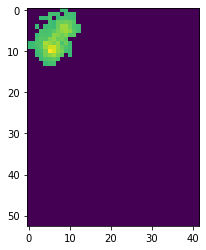

In [101]:
i = ind[17]

print('predicted %i' % predicted[i])
print('actual %i' % target[i])
print(clf.decision_function([data[i]]))
plt.imshow(cl[i])

ind[15]

In [102]:
target[307]

1

In [88]:
clf.decision_function(data)

array([-1.27389403, -0.8371217 , -1.31266353, -1.18027847, -1.25240342,
       -0.94820927, -0.93540775,  1.08787886, -1.02317502, -1.26585387,
       -1.46803454, -1.22490814, -1.09378148,  1.0158444 , -1.20954386,
       -1.27975946, -1.29670861, -1.20542863, -1.16268575, -1.26054814,
       -1.28658723, -1.1714736 , -1.24210911, -1.07295006, -1.22045253,
       -1.18649574, -1.27500001, -1.37659779,  0.60235748, -1.13432924,
       -1.24973301, -1.32017958,  0.94861693, -1.14140077, -1.44876154,
       -1.36335108, -1.11591004,  1.15650581,  1.44138622,  1.76630314,
       -0.81905751,  1.36626681, -1.32782625,  1.10933691, -1.35832416,
       -0.97057292, -1.3344266 , -1.20730395, -1.03525965, -0.49556301,
       -1.2430175 , -1.21356175, -0.8532254 , -1.45725992, -1.47230467,
       -0.88325078, -0.49638132, -0.55368931, -1.21806248, -1.19452365,
       -1.33296672, -1.203386  , -1.1102212 , -1.03089752, -1.10546176,
       -0.46165532, -1.50752627,  1.39713143, -1.20864426, -1.10